# Car Make Classifier: Full Scale

In the modern automotive industry, visual brand identity plays a crucial role. Each car manufacturer designs vehicles with unique styling elements—from grille shape to headlight design—that make their cars instantly recognizable. 

In this project, we aim to harness the power of image classification using deep learning to build a model that can automatically identify whether a car in an image belongs to BMW, Porsche, Toyota, Peugeut, Tesla, Audi, etc.

### 🎯 Objective
For the initial model we are going to feed it with images from one of the most immediatelly recognizable cars: **Audi**, **BMW** and **Mercedes**.

The goal is to develop a machine learning model that takes a full image of a car and correctly classifies it as one of the brands from above. The model will be trained on a curated image dataset and evaluated on its ability to generalize to new, unseen car images.

-----

## 🌐 Domain Context
In today's digital landscape, apps that leverage computer vision are becoming increasingly prevalent across industries — from retail and security to automotive technology. Within the automotive domain, identifying the make of a vehicle from a photo has practical value in multiple applications: car listing platforms, mobile parking apps, AI-powered insurance inspections, and even driver-assistance systems.

Ultimately, this project demonstrates how AI can bridge the gap between real-world visual data and intelligent brand recognition, opening the door for smarter, image-driven applications in the automotive and consumer tech space.

In [2]:
import copy, pathlib, math
import PIL.Image as Image

import sklearn
import numpy
import matplotlib
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", numpy.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.6.1
numpy version: 1.23.5
matplotlib version: 3.10.0


## 📦 Data Provisioning

For this project, the dataset was curated from various sources on the internet. Images representing three car brands—**Audi**, **BMW**, and **Mercedes**—were collected. The dataset includes a mix of clear, high-quality images typically used for car listings, as well as blurrier images captured from traffic cameras to ensure diversity and robustness in the model.

- **Brands:** Audi, BMW, Mercedes  
- **Image Count:** At least 50 images per brand, with some brands having more  
- **Image Variety:** Both clear/listing images and real-world, lower-quality images

All images are organized in subfolders named after their respective brands. This structure allows for straightforward loading and labeling during the data preparation phase. 

In [3]:
import numpy as np

size = 256

def load_image(file, size):
    img = Image.open(file).convert("RGB")  # Convert all images to RGB
    img = img.resize((size, size))
    return np.array(img).flatten() 

def load_labelled_images(path, size):
    labels = list()
    files = list()
    for file_info in pathlib.Path(path).glob("**/*"):
        if file_info.suffix.lower() in ['.jpg', '.jpeg', '.png']:  
            labels.append(file_info.parent.name)  
            files.append(str(file_info))
    imgs = numpy.array([load_image(f, size) for f in files])
    return imgs, numpy.array(labels)      

images, labels = load_labelled_images("./car_dataset", size)
print("Loaded", len(images), "images in the following", len(numpy.unique(labels)), "classes:")
for label in numpy.unique(labels):
    print(label)

Loaded 179 images in the following 3 classes:
audi
bmw
mercedes


# 📃 Sample the data
To get an impression of the data, here a sample from the loaded images is plotted so see if they we loaded correctly.

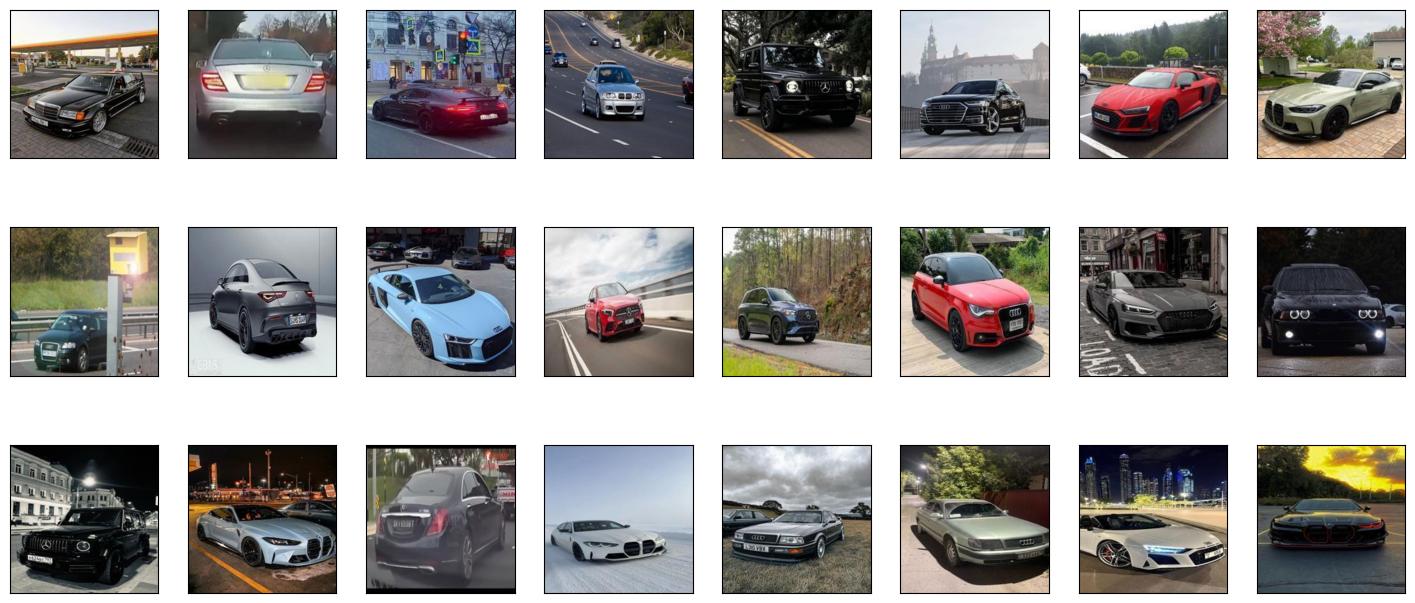

In [7]:
sample_size = 24


plotimgs = copy.deepcopy(images)
numpy.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

🪓 Splitting into train/test

A split of 70%/30% is chosen here in order to have a fairly large number of testing images. 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=0)

# 🧬 Modelling

In this step the model will be fitted with the trainset only. In this case a [Support Vector Machine for classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [9]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3148148148148148


# 🔬 Evaluation
Below a classification report is printed. This shows for every one of the classes how well the model performed.

In [10]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

        audi       0.39      0.67      0.49        21
         bmw       0.17      0.21      0.19        14
    mercedes       0.00      0.00      0.00        19

    accuracy                           0.31        54
   macro avg       0.19      0.29      0.23        54
weighted avg       0.19      0.31      0.24        54



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

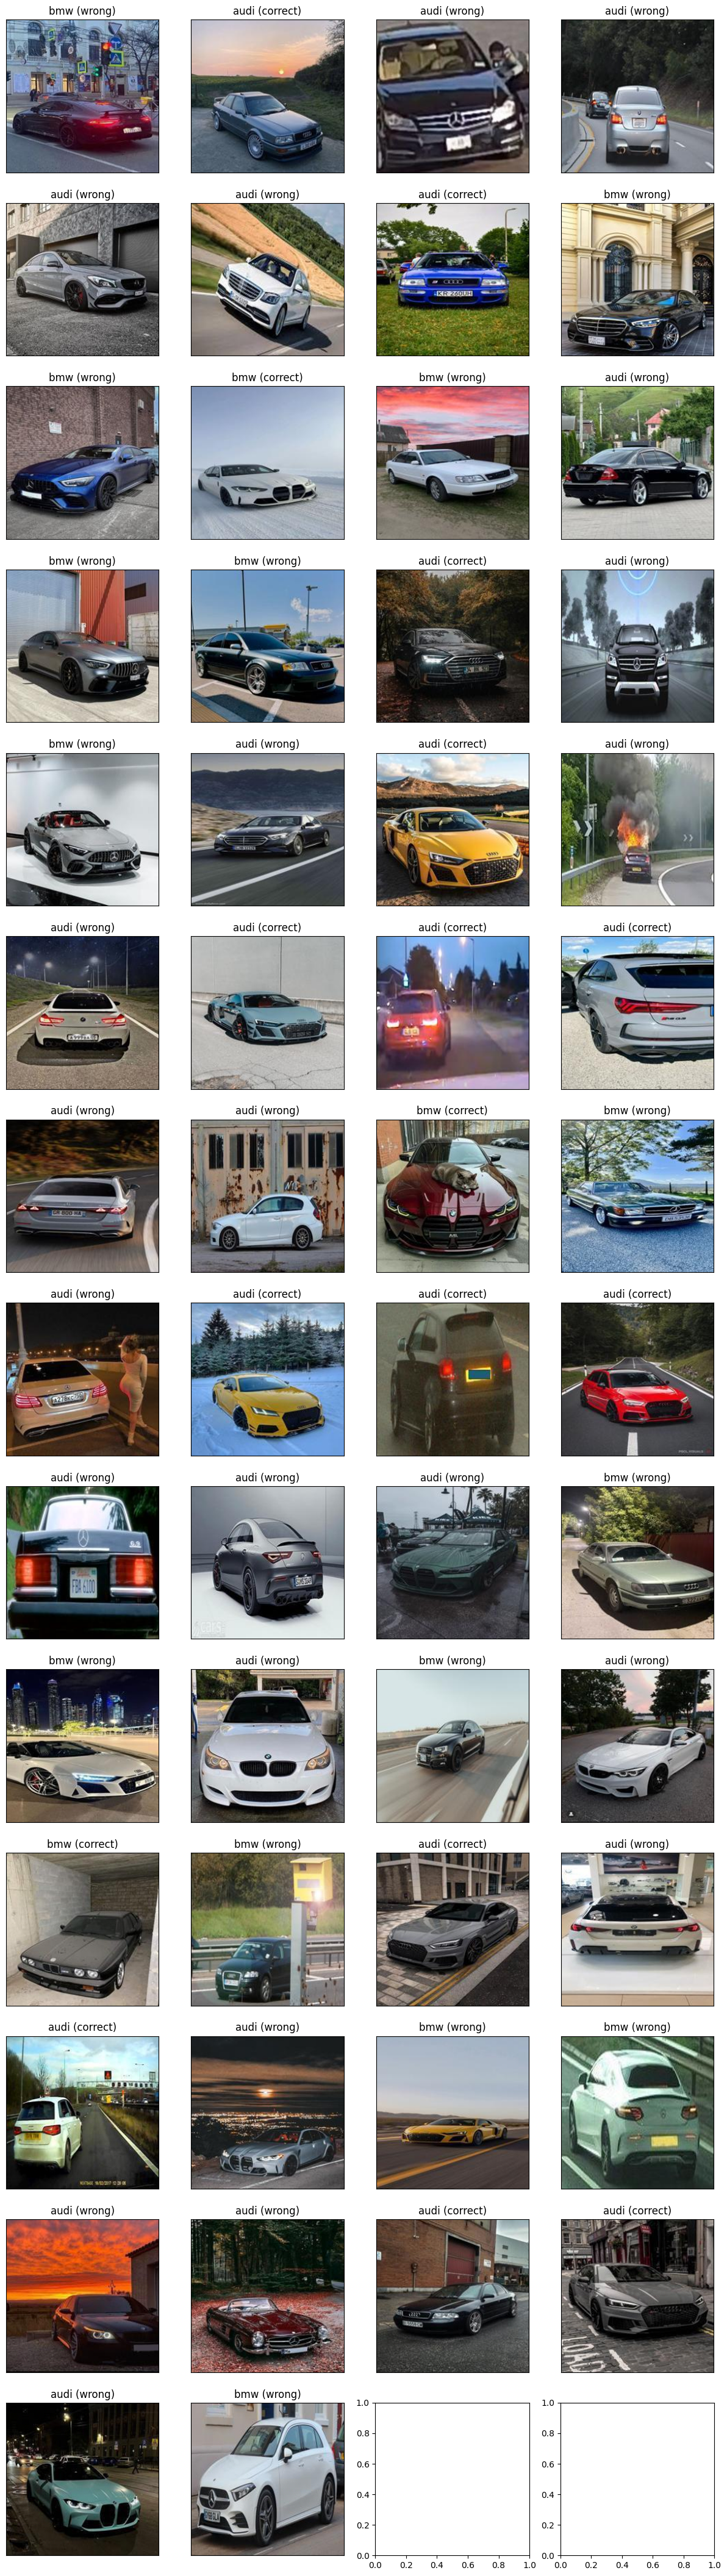

In [11]:
_, subplots = plt.subplots(nrows = math.ceil(len(X_test)/4), ncols = 4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, x in enumerate(X_test):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    subplots[i].set_title(predictions[i] + (" (correct)" if predictions[i] == y_test[i] else " (wrong)"))

In [12]:
from sklearn.svm import SVC

for C_value in [0.5, 1.0, 2.0]:
    model = SVC(C=C_value)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Accuracy with C={C_value}: {score:.4f}")

Accuracy with C=0.5: 0.3889
Accuracy with C=1.0: 0.3148
Accuracy with C=2.0: 0.2778


In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Accuracy with {kernel} kernel: {score:.4f}")

Accuracy with linear kernel: 0.2963
Accuracy with poly kernel: 0.3148
Accuracy with rbf kernel: 0.3148
Accuracy with sigmoid kernel: 0.3704
